<img align="center" src="https://sun9-60.userapi.com/impg/p3Y7_mxIo8o16iddDVtEOSf5jAJqrNtrINUCpw/UzPFVPGpu9Y.jpg?size=750x750&quality=95&sign=336e82f3e4a84ccf4f0123e45abef8a2&type=album" width="350"> 


## Команда пыльных мышек представляет
# Проект по Анализу данных на питоне
### Выполнено Деркач Ульяной и Ивановой Дарьей

## Часть 1: Подготовка данных

Для нашего исследования нами были отобраны три массива данных, представляющих собой агрегированную информацию о различных показателях Московского метрополитена, его станций и линий. Давайте посмотрим на данные:

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

In [2]:
df_accu = pd.read_excel('accuracy.xlsx')
df_accu.head()

,Line,Year,Quarter,Precision,global_id,Line_en,Year_en,Quarter_en,Precision_en
0,Линия,Год,Квартал,Процент выполнения расписания (%),global_id,Line_en,Year_en,Quarter_en,Precision_en
1,Сокольническая линия,2021,I квартал,99.99,1139011455,NaN,NaN,NaN,NaN
2,Замоскворецкая линия,2021,I квартал,99.99,1139011456,NaN,NaN,NaN,NaN
3,Арбатско-Покровская линия,2021,I квартал,99.99,1139011457,NaN,NaN,NaN,NaN
4,Филёвская линия,2021,I квартал,99.99,1139011458,NaN,NaN,NaN,NaN


В таблице “accuracy.xlsx” содержится информация о точности выполнения расписания поездами Московского метрополитена на разных линиях метро по кварталам с 2021 по 2023 год включительно. Видно, что в исходных данных есть пустные столбцы. Избавимся от них.
Кроме того, для удобства уберем первую строку, дублирующую название столбцов на русском. Аналогичные преобразования сделаем и для других таблиц, но об этом подробнее ниже.

In [3]:
drop = ['global_id', 'Line_en',
       'Year_en', 'Quarter_en', 'Precision_en']

df_accu.drop(labels=drop, axis=1, inplace = True)
df_accu.drop(labels = 0, axis=0, inplace = True)

df_accu = df_accu.reset_index(drop=True)

Теперь в нашей таблице представлены следующие признаки:
- **Line** - содержит название линии метро
- **Year** - год, в котором был рассчитан показатель
- **Quarter** - квартал года, в котором был рассчитан показатель 
- **Precision** - точность выполнения расписания (непосредственный показатель)

Посмотрим на их формат и преобразуем в нужный там, где потребуется:

In [4]:
df_accu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Line       144 non-null    object
 1   Year       144 non-null    object
 2   Quarter    144 non-null    object
 3   Precision  144 non-null    object
dtypes: object(4)
memory usage: 4.6+ KB


In [5]:
df_accu['Precision'] = df_accu['Precision'].astype(float)

Так как точность выполнения расписания высокая на каждой линии, мы решили отнормировать этот показатель с помощью минимаксной нормализации. Полученные значения были добавлены в столбец Precision_normalized, теперь точность выполнения стало чуть легче сравнивать.

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_accu['Precision_normalized'] = scaler.fit_transform(df_accu[['Precision']])
df_accu

,Line,Year,Quarter,Precision,Precision_normalized
0,Сокольническая линия,2021,I квартал,99.99,0.947368
1,Замоскворецкая линия,2021,I квартал,99.99,0.947368
2,Арбатско-Покровская линия,2021,I квартал,99.99,0.947368
3,Филёвская линия,2021,I квартал,99.99,0.947368
4,Кольцевая линия,2021,I квартал,99.99,0.947368
...,...,...,...,...,...
139,Солнцевская линия,2023,I квартал,99.99,0.947368
140,Некрасовская линия,2023,I квартал,100.00,1.000000
141,Большая кольцевая линия,2023,I квартал,99.98,0.894737
142,Московская монорельсовая транспортная система,2023,I квартал,100.00,1.000000


На этом подготовка первой таблицы закончена.
Перейдем к следующей:

In [7]:
df_traffic = pd.read_excel('passenger_traffic.xlsx')
df_traffic.head()

,NameOfStation,Line,Year,Quarter,IncomingPassengers,OutgoingPassengers,global_id,NameOfStation_en,Line_en,Year_en,Quarter_en,IncomingPassengers_en,OutgoingPassengers_en
0,Станция метрополитена,Линия,Год,Квартал,Входы пассажиров,Выходы пассажиров,global_id,NameOfStation_en,Line_en,Year_en,Quarter_en,IncomingPassengers_en,OutgoingPassengers_en
1,Митино,Арбатско-Покровская линия,2021,I квартал,1913498,1829031,1138975996,NaN,NaN,NaN,NaN,NaN,NaN
2,Волоколамская,Арбатско-Покровская линия,2021,I квартал,1236714,1222309,1138975997,NaN,NaN,NaN,NaN,NaN,NaN
3,Строгино,Арбатско-Покровская линия,2021,I квартал,1938816,1903731,1138975999,NaN,NaN,NaN,NaN,NaN,NaN
4,Крылатское,Арбатско-Покровская линия,2021,I квартал,1849616,1818208,1138976000,NaN,NaN,NaN,NaN,NaN,NaN


Таблица “passenger_traffic.xlsx” содержит информацию о пассажиропотоке (так называемой загруженности) станций Московского метрополитена (станции также сгруппированы по линиям) с 2021 по 2023 год включительно. Признаки следующие:
- **NameOfStation** - название станции метро
- **Line** - линия метрополитена, к которой относится станция 
- **Year** - год, в котором был рассчитан показатель
- **Quarter** - квартал года, в котором был рассчитан показатель
- **IncomingPassengers** - количество пассажиров, вошедших через турникеты на этой станции метро
- **OutgoingPassengers** - количество пассажиров, вышедших на этой станции метро

In [8]:
dropp = ['global_id', 'NameOfStation_en', 'Line_en', #так же удалили пустые столбцы и первую строку
       'Year_en', 'Quarter_en', 'IncomingPassengers_en',
       'OutgoingPassengers_en']
df_traffic.drop(labels=dropp, axis=1, inplace = True)
df_traffic.drop(labels = 0, axis=0, inplace = True)
df_traffic = df_traffic.reset_index(drop=True)

In [9]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   NameOfStation       2520 non-null   object
 1   Line                2520 non-null   object
 2   Year                2520 non-null   object
 3   Quarter             2520 non-null   object
 4   IncomingPassengers  2520 non-null   object
 5   OutgoingPassengers  2520 non-null   object
dtypes: object(6)
memory usage: 118.2+ KB


In [10]:
df_traffic[['IncomingPassengers', 'OutgoingPassengers']] = df_traffic[['IncomingPassengers', 'OutgoingPassengers']].astype(int)

Удалили лишние, отформатировали. 

In [11]:
df_traffic

,NameOfStation,Line,Year,Quarter,IncomingPassengers,OutgoingPassengers
0,Митино,Арбатско-Покровская линия,2021,I квартал,1913498,1829031
1,Волоколамская,Арбатско-Покровская линия,2021,I квартал,1236714,1222309
2,Строгино,Арбатско-Покровская линия,2021,I квартал,1938816,1903731
3,Крылатское,Арбатско-Покровская линия,2021,I квартал,1849616,1818208
4,Площадь Революции,Арбатско-Покровская линия,2021,I квартал,2324687,2319343
...,...,...,...,...,...,...
2515,Сокольники,Сокольническая линия,2023,I квартал,1892829,1916655
2516,Проспект Вернадского,Сокольническая линия,2023,I квартал,2129756,2141124
2517,Китай-город,Таганско-Краснопресненская линия,2023,I квартал,0,0
2518,Кунцевская,Филёвская линия,2023,I квартал,518577,502962


In [12]:
df_traffic.isnull().sum()

NameOfStation         0
Line                  0
Year                  0
Quarter               0
IncomingPassengers    0
OutgoingPassengers    0
dtype: int64

In [13]:
((df_traffic['IncomingPassengers'] | df_traffic['OutgoingPassengers']) == 0).sum()

70

Как видно **NaN**ов в таблице нет, но нули есть. Вряд ли какие-то станции не фунцкционировали в какой-то квартал. Скорее просто не было собрано данных за тот период. Так как в таблице `df_traffic` представлена информация по 9 кварталам практически для каждой станции, не хочется рушить такую закономерность, поэтому мы решили заменить эти нули на медиану среди значений по станции. Код смотри в "Часть 2: Разведка".

И наконец, посмотрим на последнюю (но не по важности) таблицу. 

In [14]:
df_info = pd.read_excel('info.xlsx')
df_info.head()

,Line,NumberOfStations,MetroLineLength,NumberOfCarriages,global_id,Line_en,NumberOfStations_en,MetroLineLength_en,NumberOfCarriages_en
0,Линия,Количество станций,Эксплуатационная длина (км),Количество вагонов,global_id,Line_en,NumberOfStations_en,MetroLineLength_en,NumberOfCarriages_en
1,Сокольническая линия,26,41.34,509,1138975976,NaN,NaN,NaN,NaN
2,Замоскворецкая линия,24,42.92,746,1138975977,NaN,NaN,NaN,NaN
3,Арбатско-Покровская линия,22,44.98,479,1138975978,NaN,NaN,NaN,NaN
4,Филёвская линия,13,14.53,162,1138975979,NaN,NaN,NaN,NaN


In [15]:
df_info.columns

Index(['Line', 'NumberOfStations', 'MetroLineLength', 'NumberOfCarriages',
       'global_id', 'Line_en', 'NumberOfStations_en', 'MetroLineLength_en',
       'NumberOfCarriages_en'],
      dtype='object')

In [16]:
droppp = ['global_id', 'Line_en', 'NumberOfStations_en', 'MetroLineLength_en',
       'NumberOfCarriages_en']
df_info.drop(labels=droppp, axis=1, inplace = True)
df_info.drop(labels = 0, axis=0, inplace = True)
df_info = df_info.reset_index(drop=True)

In [17]:
df_info[['NumberOfStations', 'NumberOfCarriages']] = df_info[['NumberOfStations', 'NumberOfCarriages']].astype(int)
df_info['MetroLineLength'] = df_info['MetroLineLength'].astype(float)
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Line               16 non-null     object 
 1   NumberOfStations   16 non-null     int64  
 2   MetroLineLength    16 non-null     float64
 3   NumberOfCarriages  16 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 640.0+ bytes


Посмотрели. Удалили пустые. Перевели в другой формат. Другие слова излишни.

In [18]:
df_info.head()

,Line,NumberOfStations,MetroLineLength,NumberOfCarriages
0,Сокольническая линия,26,41.34,509
1,Замоскворецкая линия,24,42.92,746
2,Арбатско-Покровская линия,22,44.98,479
3,Филёвская линия,13,14.53,162
4,Кольцевая линия,12,19.17,280


Все наши таблицы объединяет одна вещь (помимо этих двух: то, что они таблицы, то, что информация касается метро) -- это Линии. По значениям различных признаков для линий мы и будем сопостовлять таблицы. Но для начала проверим, что во всех таблицах линии одинаковы.


In [19]:
set(df_info['Line'].unique()) - set(df_accu['Line'].unique())

set()

In [20]:
set(df_traffic['Line'].unique()) - set(df_info['Line'].unique())

{'Каховская линия'}

в `df_traffic` есть шальная линия "Каховская". Удалим ее, так как по ней нет данных в других таблицах.

In [21]:
df_traffic[df_traffic['Line'] == 'Каховская линия']


,NameOfStation,Line,Year,Quarter,IncomingPassengers,OutgoingPassengers
800,Каширская,Каховская линия,2021,III квартал,0,0


In [22]:
df_traffic.drop(index=800, inplace=True)
df_traffic = df_traffic.reset_index(drop=True)
df_traffic

,NameOfStation,Line,Year,Quarter,IncomingPassengers,OutgoingPassengers
0,Митино,Арбатско-Покровская линия,2021,I квартал,1913498,1829031
1,Волоколамская,Арбатско-Покровская линия,2021,I квартал,1236714,1222309
2,Строгино,Арбатско-Покровская линия,2021,I квартал,1938816,1903731
3,Крылатское,Арбатско-Покровская линия,2021,I квартал,1849616,1818208
4,Площадь Революции,Арбатско-Покровская линия,2021,I квартал,2324687,2319343
...,...,...,...,...,...,...
2514,Сокольники,Сокольническая линия,2023,I квартал,1892829,1916655
2515,Проспект Вернадского,Сокольническая линия,2023,I квартал,2129756,2141124
2516,Китай-город,Таганско-Краснопресненская линия,2023,I квартал,0,0
2517,Кунцевская,Филёвская линия,2023,I квартал,518577,502962


**На этом, вроде как, подготовка данных закончена**

## Часть 2: Разведка

В таблице df_traffic имеется две колонки для указания периода, что значительно усложняет поиск и агрегацию информации, поэтому мы решили добавить новый признак и закодировать в него период (квартал и год).

In [23]:
df_traffic['Quarter'].unique()

array(['I квартал', 'II квартал', 'III квартал', 'IV квартал'],
      dtype=object)

In [24]:
df_traffic['Period'] = 0

df_traffic.loc[(df_traffic['Year'] == '2021') & (df_traffic['Quarter'] == 'I квартал'), 'Period'] = 1
df_traffic.loc[(df_traffic['Year'] == '2021') & (df_traffic['Quarter'] == 'II квартал'), 'Period'] = 2
df_traffic.loc[(df_traffic['Year'] == '2021') & (df_traffic['Quarter'] == 'III квартал'), 'Period'] = 3
df_traffic.loc[(df_traffic['Year'] == '2021') & (df_traffic['Quarter'] == 'IV квартал'), 'Period'] = 4

df_traffic.loc[(df_traffic['Year'] == '2022') & (df_traffic['Quarter'] == 'I квартал'), 'Period'] = 5
df_traffic.loc[(df_traffic['Year'] == '2022') & (df_traffic['Quarter'] == 'II квартал'), 'Period'] = 6
df_traffic.loc[(df_traffic['Year'] == '2022') & (df_traffic['Quarter'] == 'III квартал'), 'Period'] = 7
df_traffic.loc[(df_traffic['Year'] == '2022') & (df_traffic['Quarter'] == 'IV квартал'), 'Period'] = 8

df_traffic.loc[(df_traffic['Year'] == '2023') & (df_traffic['Quarter'] == 'I квартал'), 'Period'] = 9

df_traffic


,NameOfStation,Line,Year,Quarter,IncomingPassengers,OutgoingPassengers,Period
0,Митино,Арбатско-Покровская линия,2021,I квартал,1913498,1829031,1
1,Волоколамская,Арбатско-Покровская линия,2021,I квартал,1236714,1222309,1
2,Строгино,Арбатско-Покровская линия,2021,I квартал,1938816,1903731,1
3,Крылатское,Арбатско-Покровская линия,2021,I квартал,1849616,1818208,1
4,Площадь Революции,Арбатско-Покровская линия,2021,I квартал,2324687,2319343,1
...,...,...,...,...,...,...,...
2514,Сокольники,Сокольническая линия,2023,I квартал,1892829,1916655,9
2515,Проспект Вернадского,Сокольническая линия,2023,I квартал,2129756,2141124,9
2516,Китай-город,Таганско-Краснопресненская линия,2023,I квартал,0,0,9
2517,Кунцевская,Филёвская линия,2023,I квартал,518577,502962,9


Заменим нули на медиану в `df_traffic`:

In [25]:
df_na = df_traffic.replace(0, np.nan)
df_na.set_index('NameOfStation', inplace=True)

In [26]:
in_median = pd.DataFrame(df_traffic.groupby('NameOfStation')['IncomingPassengers'].median())
out_median = pd.DataFrame(df_traffic.groupby('NameOfStation')['OutgoingPassengers'].median())

df_na['IncomingPassengers'] = df_na['IncomingPassengers'].fillna(value = in_median['IncomingPassengers'] )
df_na['OutgoingPassengers'] = df_na['OutgoingPassengers'].fillna(value = out_median['OutgoingPassengers'] )
df_na

,Line,Year,Quarter,IncomingPassengers,OutgoingPassengers,Period
NameOfStation,,,,,,
Митино,Арбатско-Покровская линия,2021,I квартал,1913498.0,1829031.0,1
Волоколамская,Арбатско-Покровская линия,2021,I квартал,1236714.0,1222309.0,1
Строгино,Арбатско-Покровская линия,2021,I квартал,1938816.0,1903731.0,1
Крылатское,Арбатско-Покровская линия,2021,I квартал,1849616.0,1818208.0,1
Площадь Революции,Арбатско-Покровская линия,2021,I квартал,2324687.0,2319343.0,1
...,...,...,...,...,...,...
Сокольники,Сокольническая линия,2023,I квартал,1892829.0,1916655.0,9
Проспект Вернадского,Сокольническая линия,2023,I квартал,2129756.0,2141124.0,9
Китай-город,Таганско-Краснопресненская линия,2023,I квартал,4151382.0,4281409.0,9


In [27]:
df_na.reset_index(inplace=True)
df_traffic['IncomingPassengers'] = df_na['IncomingPassengers']
df_traffic['OutgoingPassengers'] = df_na['OutgoingPassengers']

In [28]:
df_traffic

,NameOfStation,Line,Year,Quarter,IncomingPassengers,OutgoingPassengers,Period
0,Митино,Арбатско-Покровская линия,2021,I квартал,1913498.0,1829031.0,1
1,Волоколамская,Арбатско-Покровская линия,2021,I квартал,1236714.0,1222309.0,1
2,Строгино,Арбатско-Покровская линия,2021,I квартал,1938816.0,1903731.0,1
3,Крылатское,Арбатско-Покровская линия,2021,I квартал,1849616.0,1818208.0,1
4,Площадь Революции,Арбатско-Покровская линия,2021,I квартал,2324687.0,2319343.0,1
...,...,...,...,...,...,...,...
2514,Сокольники,Сокольническая линия,2023,I квартал,1892829.0,1916655.0,9
2515,Проспект Вернадского,Сокольническая линия,2023,I квартал,2129756.0,2141124.0,9
2516,Китай-город,Таганско-Краснопресненская линия,2023,I квартал,4151382.0,4281409.0,9
2517,Кунцевская,Филёвская линия,2023,I квартал,518577.0,502962.0,9


Для начала подсчитаем среднее количество входящих и выходящих пассажиров за 9 перидов (4 квартала 2021 года, 4 квартала 2022 года, 1 квартал 2023 года), а также среднюю точность выполнения расписания. Добавим новые признаки в `df_info`:

In [29]:
df_info.set_index('Line', inplace=True)

In [30]:
df_info['MeanOfIncoming'] = df_traffic.groupby('Line')['IncomingPassengers'].mean()
df_info['MeanOfOutgoing'] = df_traffic.groupby('Line')['OutgoingPassengers'].mean()
df_info['MeanPrecision'] = df_accu.groupby('Line')['Precision_normalized'].mean()
df_info

,NumberOfStations,MetroLineLength,NumberOfCarriages,MeanOfIncoming,MeanOfOutgoing,MeanPrecision
Line,,,,,,
Сокольническая линия,26,41.34,509,1.845890e+06,1.832848e+06,0.947368
Замоскворецкая линия,24,42.92,746,2.561242e+06,2.520732e+06,0.947368
Арбатско-Покровская линия,22,44.98,479,2.551946e+06,2.531096e+06,0.964912
Филёвская линия,13,14.53,162,9.968136e+05,9.978888e+05,0.959064
Кольцевая линия,12,19.17,280,2.909215e+06,2.821681e+06,0.783626
Калининская линия,8,16.22,248,3.100894e+06,3.119827e+06,0.906433
Калужско-Рижская линия,24,37.83,671,2.581077e+06,2.630206e+06,0.929825
Таганско-Краснопресненская линия,23,42.00,672,3.036540e+06,3.021793e+06,0.918129
Серпуховско-Тимирязевская линия,25,41.31,696,2.367964e+06,2.391858e+06,0.941520


*Примечание:* нам не нравится вид с ешками в столбцах, но на данном этапе мы пока решили его оставить.

In [31]:
#df_info[['MeanOfIncomingLog','MeanOfOutgoingLog']] = df_info[['MeanOfIncoming','MeanOfOutgoing']].apply(lambda x: np.log(x + 1))
#также прологорифмировали, но стала плохо различима разница в средних по разным веткам, пока оставим, вдруг потом пригодится

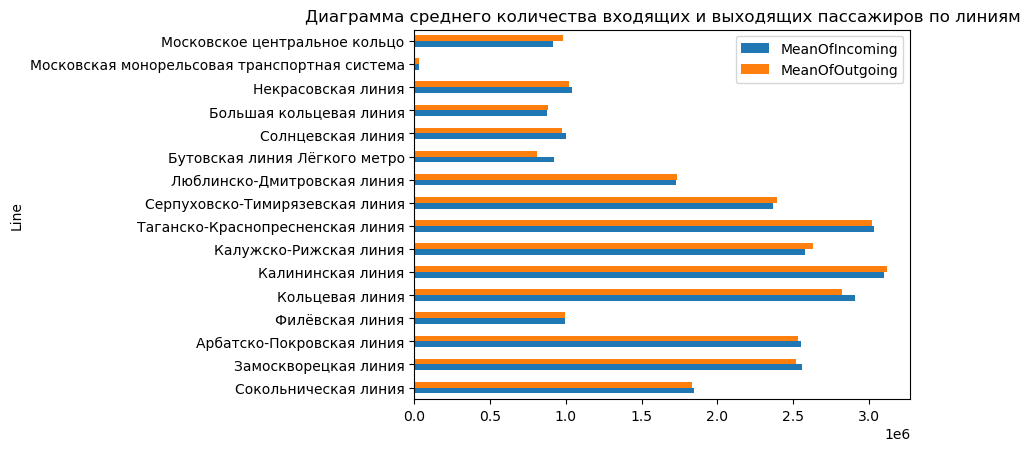

In [32]:
df_info[['MeanOfIncoming', 'MeanOfOutgoing']].plot.barh()
plt.title('Диаграмма среднего количества входящих и выходящих пассажиров по линиям');

*Примечание:* На данном этапе наши графики выглядят убого, но мы хотим их сделать покрасивше, просим понять и простить.

In [33]:
color ={ "Сокольническая линия": "red", "Замоскворецкая линия": "green", "Арбатско-Покровская линия": "blue", 
                                           "Филёвская линия": "deepskyblue", "Кольцевая линия": "brown",
                                           "Калининская линия": "yellow", "Калужско-Рижская линия": "orange",
                                           "Таганско-Краснопресненская линия": "purple", "Серпуховско-Тимирязевская линия": "grey",
                                           "Люблинско-Дмитровская линия": "lightgreen", "Бутовская линия Лёгкого метро": "cyan",
                                           "Солнцевская линия": "yellow", "Большая кольцевая линия": "magenta", 
                                           "Некрасовская линия": "pink", "Московская монорельсовая транспортная система": "navy", "Московское центральное кольцо": "black"}
colors = ["red", "green", "blue", "deepskyblue", "brown",  "yellow", "orange", "lightgreen", "cyan" , "yellow", "magenta", "pink", "navy", "black"]

#здесь мы хотели использовать цвета веток на графиках, но пока что не до конца разобрались, да и красиво не получилось
#тоже может пригодиться

Мы хотим посмотреть на распределение среднего количества входящих и выходящих пассажиров на каждой ветке в зависимости от времени года.  Времена года мы интерпретируем так: 1,5,9 (первый квартал каждого года) = зима; 2,6 = весна; 3,7 = лето; 4,8 = осень. Разницу в средних, зависящую от времени года, будем использовать далее при составлении гипотезы. 

In [34]:
df_agg = df_traffic.groupby(['Line', 'Period'])[['IncomingPassengers','OutgoingPassengers']].agg('mean')

df_agg

IncomingPassengers  OutgoingPassengers
Line                      Period                                        
Арбатско-Покровская линия 1             2.209581e+06        2.190833e+06
                          2             2.507321e+06        2.486089e+06
                          3             2.555867e+06        2.524631e+06
                          4             2.643676e+06        2.625269e+06
                          5             2.449993e+06        2.429941e+06
...                                              ...                 ...
Филёвская линия           5             9.736991e+05        9.711412e+05
                          6             1.052826e+06        1.054049e+06
                          7             1.035308e+06        1.038450e+06
                          8             1.094410e+06        1.098732e+06
                          9             1.008880e+06        1.007943e+06

[144 rows x 2 columns]

In [35]:
#здесь должен быть график, но мы еще не придумали, как сделать его красиво...;(

## Часть 3: Находки

Найдем возможные корреляционные связи между переменными. Для начала посмотрим на зависимость между количеством входящих на ветку пассажиров и длиной этой ветки:

In [36]:
coef1 = np.corrcoef(df_info['MeanOfIncoming'], df_info['MetroLineLength'])
coef1

array([[1.        , 0.24545407],
       [0.24545407, 1.        ]])

Как мы видим, зависимость показателей слабая. Не будем брать ее в расчет.
Теперь рассмотрим корреляцию между количеством входящих на линию пассажиров и точностью расписания. По нашей гипотезе предполагается отрицательная зависимость, так как большой пассажиропоток может задерживать состав на станции, а значит на следующую станцию он приедет с опозданием, что сбивает расписание. 

In [37]:
coef2 = np.corrcoef(df_info['MeanOfIncoming'], df_info['MeanPrecision'])
coef2


array([[ 1.        , -0.49714667],
       [-0.49714667,  1.        ]])

Наблюдается средняя отрицательная зависимость. Построим для данных призаков облако рассеивания.

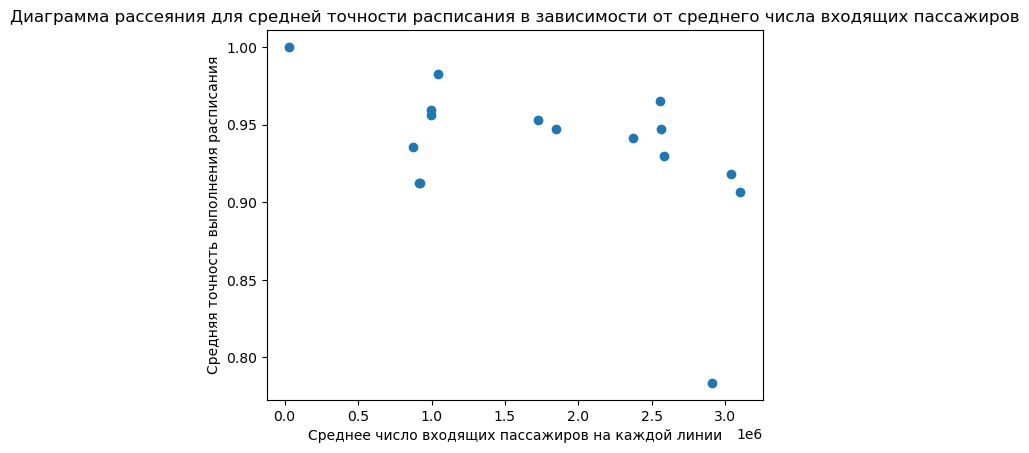

In [38]:
plt.scatter(df_info['MeanOfIncoming'],df_info['MeanPrecision'])
plt.title("Диаграмма рассеяния для средней точности расписания в зависимости от среднего числа входящих пассажиров")
plt.xlabel("Среднее число входящих пассажиров на каждой линии")
plt.ylabel("Средняя точность выполнения расписания");
#обещаем: сделаем из этого графика конфетку, просто чуть позже

На графике виден статистический выброс (нижняя правая точка). Данная ветка (Кольцевая линия метро) в среднем функционирует хуже остальных и при своей высокой загруженности имеет наименьшую точность выполнения расписания. Это может быть связано со старым составом поездов, а также с круговым характером движения на линии. Наивысшую точность имеет Московская монорельсовая транспортная система, но она также характеризуется самой низкой загруженностью.

In [39]:
df_info

,NumberOfStations,MetroLineLength,NumberOfCarriages,MeanOfIncoming,MeanOfOutgoing,MeanPrecision
Line,,,,,,
Сокольническая линия,26,41.34,509,1.845890e+06,1.832848e+06,0.947368
Замоскворецкая линия,24,42.92,746,2.561242e+06,2.520732e+06,0.947368
Арбатско-Покровская линия,22,44.98,479,2.551946e+06,2.531096e+06,0.964912
Филёвская линия,13,14.53,162,9.968136e+05,9.978888e+05,0.959064
Кольцевая линия,12,19.17,280,2.909215e+06,2.821681e+06,0.783626
Калининская линия,8,16.22,248,3.100894e+06,3.119827e+06,0.906433
Калужско-Рижская линия,24,37.83,671,2.581077e+06,2.630206e+06,0.929825
Таганско-Краснопресненская линия,23,42.00,672,3.036540e+06,3.021793e+06,0.918129
Серпуховско-Тимирязевская линия,25,41.31,696,2.367964e+06,2.391858e+06,0.941520


In [40]:
coef3 = np.corrcoef(df_info['MetroLineLength'], df_info['MeanOfIncoming'])
coef3
#неинтересно

array([[1.        , 0.24545407],
       [0.24545407, 1.        ]])

Построим корреляционную матрицу для таблицы `df_info` чтобы вычленить связанные показатели, которые мы еще не учли:

In [41]:
df_info_corr = df_info.corr(method='pearson')
df_info_corr

,NumberOfStations,MetroLineLength,NumberOfCarriages,MeanOfIncoming,MeanOfOutgoing,MeanPrecision
NumberOfStations,1.000000,0.899481,0.749077,0.303921,0.327631,-0.006693
MetroLineLength,0.899481,1.000000,0.798719,0.245454,0.266368,-0.018255
NumberOfCarriages,0.749077,0.798719,1.000000,0.514022,0.527058,-0.015949
MeanOfIncoming,0.303921,0.245454,0.514022,1.000000,0.998943,-0.497147
MeanOfOutgoing,0.327631,0.266368,0.527058,0.998943,1.000000,-0.481651
MeanPrecision,-0.006693,-0.018255,-0.015949,-0.497147,-0.481651,1.000000


Заметим, что между количеством курсирующих на ветке вагонов и количеством станций имеется сильная линейная связь (коэффициент корреляции приблизительно равен 75 процентам). 

Визуализируем таблицу с помощью тепловой карты:

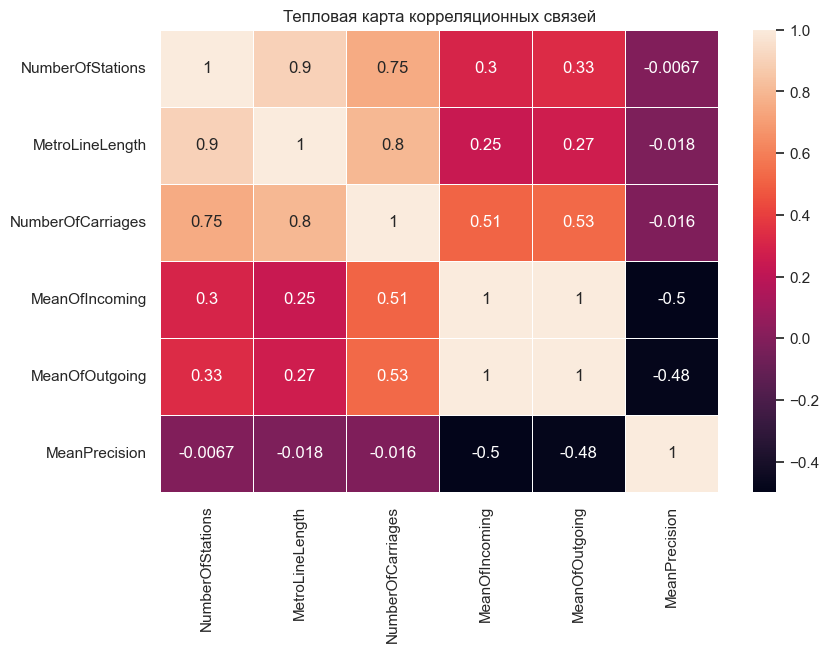

In [42]:
import seaborn as sns
sns.set_theme()

f, ax = plt.subplots(figsize=(9, 6))
plt.title('Тепловая карта корреляционных связей')
sns.heatmap(df_info_corr, annot=True, linewidths=.5, ax=ax);

По тепловой карте и столбчатой диаграмме видно, что у значений входящих и выходящих пассажиров корреляция равна единице, т.е. на линии выходит в среднем столько же людей, сколько и заходит. Сильное заявление.

In [43]:
df_traffic.groupby(['Period','Line'])[['IncomingPassengers','OutgoingPassengers']].agg('mean')

IncomingPassengers  \
Period Line                                                   
1      Арбатско-Покровская линия               2.209581e+06   
       Большая кольцевая линия                 9.631457e+05   
       Бутовская линия Лёгкого метро           7.741483e+05   
       Замоскворецкая линия                    2.436035e+06   
       Калининская линия                       2.796299e+06   
...                                                     ...   
9      Серпуховско-Тимирязевская линия         2.400584e+06   
       Сокольническая линия                    1.891369e+06   
       Солнцевская линия                       1.053442e+06   
       Таганско-Краснопресненская линия        3.058613e+06   
       Филёвская линия                         1.008880e+06   

                                         OutgoingPassengers  
Period Line                                                  
1      Арбатско-Покровская линия               2.190833e+06  
       Большая кольцевая линия                 9.721120e+05  
       Бутовская линия Лёгкого метро           7.478867e+05  
       Замоскворецкая линия                    2.403616e+06  
       Калининская линия                       2.810745e+06  
...                                                     ...  
9      Серпуховско-Тимирязевская линия         2.417404e+06  
       Сокольническая линия                    1.876883e+06  
       Солнцевская линия                       1.030962e+06  
       Таганско-Краснопресненская линия        3.036052e+06  
       Филёвская линия                         1.007943e+06  

[144 rows x 2 columns]

## Часть 4: Гипотезы

В предыдущей части мы уже проверили гипотезы о связях признаков. В этой части мы планируем проверить следующие гипотезы, которые требуют более подробного рассмотрения и работы с данными:


Гипотеза 1: Средний поток пассажиров летом (3 и 7 периоды) меньше чем зимой (1,5 и 9 периоды).

***H0:*** математическое ожидание пассажиропотока летом равно математическому ожиданию зимнего пассажиропотока. 
(мы потом это очень красиво оформим)

***H1:*** математическое ожидание пассажиропотока летом меньше математического ожидания зимнего пассажиропотока.
Мы планируем проверить эту гипотезу через построение доверительного интервала разницы математических ожиданий.

Гипотеза 2: хотим взять непараметрическую гипотезу с хи-квадрат критерием согласия, но еще не до конца ее сформулировали. 


## Часть 5: Машинное обучение

Планируем создать модель, которая будет предсказывать пассажиропоток для каждой станции и каждого квартала. 

Сделаем выводы: Если в среднем показатель агрегированного по ветке пассажиропотока имеет тенденцию к росту, то есть необходимость увеличения количества курсирующих на этой линии составов. Мы рассчитаем отношение пассажиропотока в среднем по ветке к количеству вагонов, и в соответствующей пропорции рассчитаем ожидаемое необходимое количество на будущие периоды. 